<>:121: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:209: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:211: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:213: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:215: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:217: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:219: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:221: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:121: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:209: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:211: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:213: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:215: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:217: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:219: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:221: SyntaxWarning: "is" with a literal. Did you mea

[np.float64(7.307678571428571), np.float64(7.247236671001301), np.float64(7.207808177067323), np.float64(7.182008995502249), np.float64(7.183526253984231), np.float64(7.162674811123614), np.float64(7.1824545030331315), np.float64(7.167132352941176)]
[np.float64(7.770916334661354), np.float64(7.79045643153527), np.float64(7.703819444444444), np.float64(7.699300699300699), np.float64(7.590692934782608), np.float64(7.555415219450584), np.float64(7.5249024902490245), np.float64(7.4787472035794185)]
[np.float64(16.521964285714287), np.float64(16.29242522756827), np.float64(16.033200122963418), np.float64(16.12143928035982), np.float64(16.076413353464183), np.float64(16.05730589937309), np.float64(16.235884274381707), np.float64(16.186617647058824)]
[np.float64(19.635956175298805), np.float64(19.57219917012448), np.float64(19.126041666666666), np.float64(19.074380165289256), np.float64(18.589334239130434), np.float64(18.255446795074203), np.float64(17.974047404740475), np.float64(17.74147091

/var/folders/gv/wwx54pg167n49b11qvywyt_80000gn/T/ipykernel_33417/2204108624.py:121: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if info is 'service_blocking_rate':
/var/folders/gv/wwx54pg167n49b11qvywyt_80000gn/T/ipykernel_33417/2204108624.py:209: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if info is 'total_path_length':
/var/folders/gv/wwx54pg167n49b11qvywyt_80000gn/T/ipykernel_33417/2204108624.py:211: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif info is 'service_blocking_rate':
/var/folders/gv/wwx54pg167n49b11qvywyt_80000gn/T/ipykernel_33417/2204108624.py:213: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif info is 'rss_total_metric':
/var/folders/gv/wwx54pg167n49b11qvywyt_80000gn/T/ipykernel_33417/2204108624.py:215: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif info is 'avrage_gsnr':
/var/folders/gv/wwx54pg167n49b11qvywyt_80000gn/T/ipykernel_33417/2204108624.py:217: SyntaxWarning: "is" with a literal. Did you 

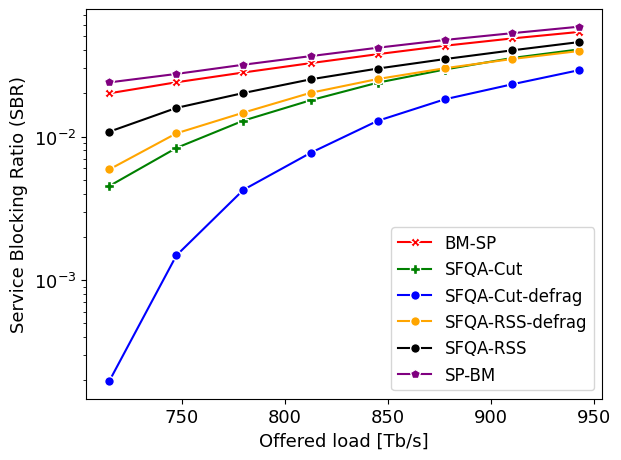

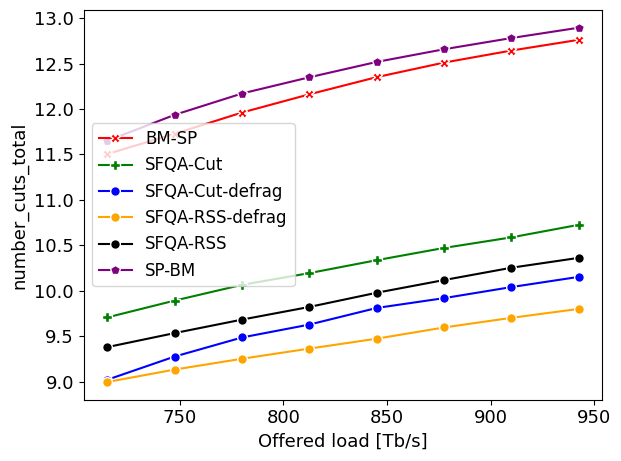

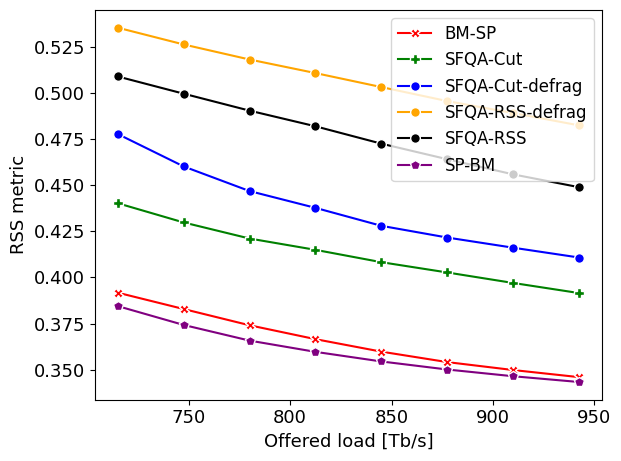

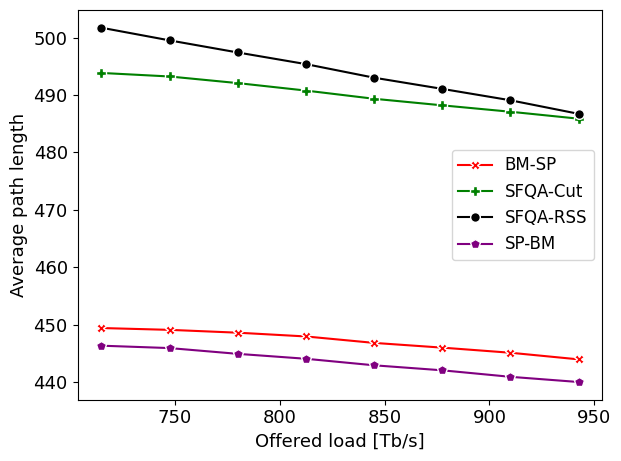

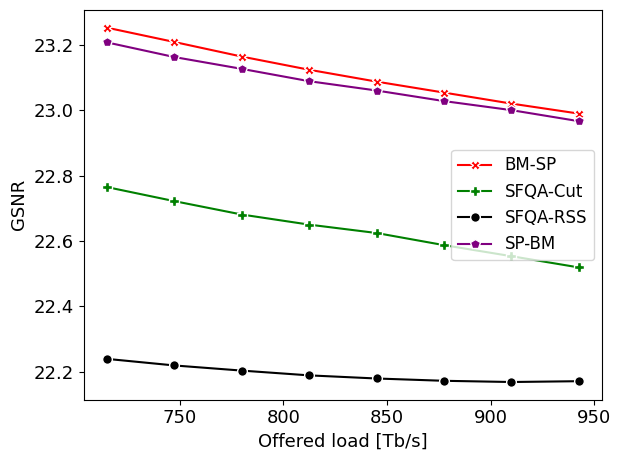

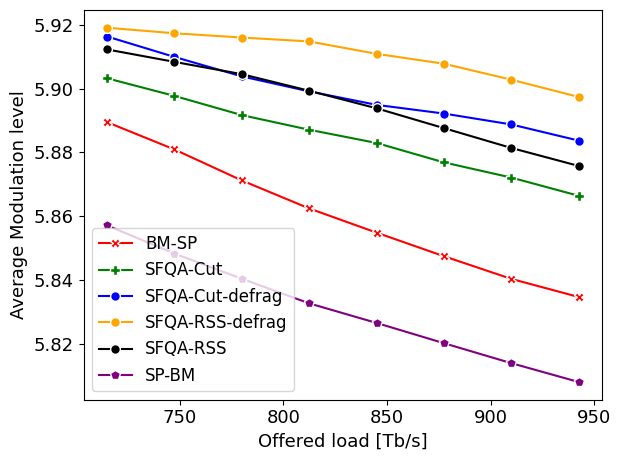

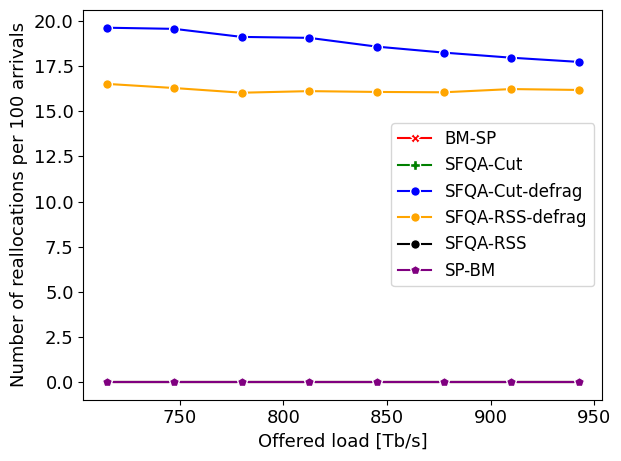

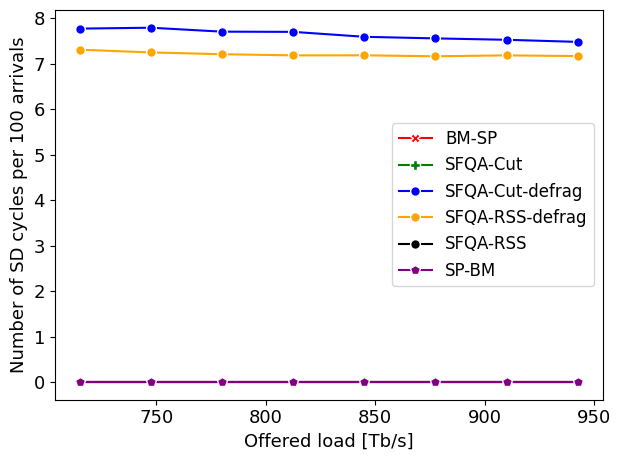

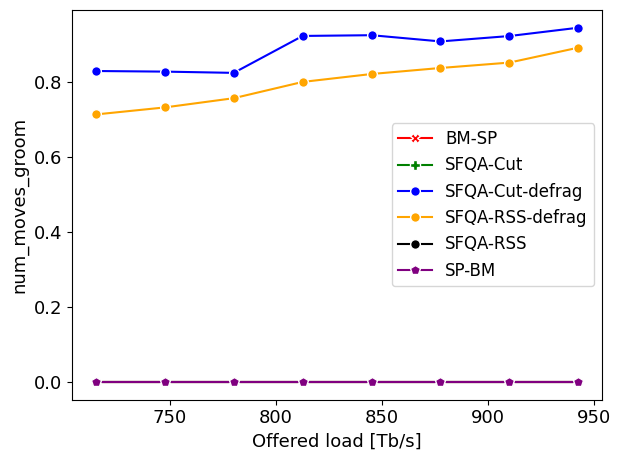

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os
# from IPython.core.display import clear_output
import numpy as np
import time

heuristic_log_dir = 'phy_frag_rmsa2/spn-results'

topology_name = 'Germany50'
topology_name = 'spn'
figures_floder = f'./{heuristic_log_dir}/figures'
os.makedirs(figures_floder, exist_ok=True)

min_load = 2200
max_load = 2901
step_length = 100
steps = int((max_load - min_load) / step_length) + 1
loads = np.zeros(steps)
episode_length = 200

metrics = [
    'episode_service_blocking_rate',
    'service_blocking_rate',
    'episode_bit_rate_blocking_rate',
    'number_cuts_total',
    'rss_total_metric',
    'total_path_length',
    'avrage_gsnr',
    'average_mod_level',
    'num_moves', 
    'num_defrag_cycle', 
    'num_moves_groom'
    
]

sap_ff_loads = {metric: [] for metric in metrics}
sap_bm_loads = {metric: [] for metric in metrics}
bm_fa_cut_loads = {metric: [] for metric in metrics}
bm_fa_rss_loads = {metric: [] for metric in metrics}
bm_sa_ff_loads = {metric: [] for metric in metrics}
bm_fa_rss_df_loads = {metric: [] for metric in metrics}
bm_sa_ff_df_loads = {metric: [] for metric in metrics}
bm_sa_ff_df_cut_loads = {metric: [] for metric in metrics}
bm_fa_cut_df_cut_loads = {metric: [] for metric in metrics}
traffic_type = 1

for load_counter, load_traffic in enumerate(range(min_load, max_load, step_length)):
    bm_fa_cut = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}/BM-FA-Cut-modified.monitor.csv',
        skiprows=1)
    bm_fa_rss = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}/BM-FA-RSS.monitor.csv', skiprows=1)
    bm_sa_ff = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}/BM-SA-FF.monitor.csv',
        skiprows=1)
    # bm_sa_ff_df = pd.read_csv(
    #     f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}-defragmeentation/BM-SA-FF.monitor.csv',
    #     skiprows=1)
    # bm_sa_ff_df_cut = pd.read_csv(
    #     f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}-defragmeentation-v3/BM-SA-FF.monitor.csv',
    #     skiprows=1)
    bm_fa_rss_df = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}-defragmeentation-rss/BM-FA-RSS.monitor.csv', skiprows=1)
    # # sap_ff = pd.read_csv(
    # #     f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}/SAP-FF.monitor.csv',
    # #     skiprows=1)
    bm_fa_cut_df_cut = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}-defragmeentation-cut/BM-FA-Cut-modified.monitor.csv', skiprows=1)
    sap_bm = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}/BM-FA-SAPBM.monitor.csv',
        skiprows=1)
    loads[load_counter] = load_traffic
    for info in ['episode_service_blocking_rate','service_blocking_rate',
                'episode_bit_rate_blocking_rate', 'number_cuts_total', 'rss_total_metric',
                'total_path_length', 'avrage_gsnr', 'average_mod_level', 'num_moves', 'num_defrag_cycle', 'num_moves_groom' ]:
        bm_fa_cut_loads[info].append(np.mean(bm_fa_cut[info]))
        #             exhuastic_highest_loads[info].append(np.mean(exhaustic_highest[info]))
        bm_fa_rss_loads[info].append(np.mean(bm_fa_rss[info]))
        bm_sa_ff_loads[info].append(np.mean(bm_sa_ff[info]))
        bm_fa_rss_df_loads[info].append(np.mean(bm_fa_rss_df[info]))
        # bm_sa_ff_df_loads[info].append(np.mean(bm_sa_ff_df[info]))
        # bm_sa_ff_df_cut_loads[info].append(np.mean(bm_sa_ff_df_cut[info]))
        # sap_ff_loads[info].append(np.mean(sap_ff[info]))
        sap_bm_loads[info].append(np.mean(sap_bm[info]))
        bm_fa_cut_df_cut_loads[info].append(np.mean(bm_fa_cut_df_cut[info]))

# print(loads)
# print(f"SBR for highest-first-fit is {highest_loads['service_blocking_per_hundred_arrivals']}")


# percentage = []
# percentage1 = []
# for i in range(len(no_df_loads['service_blocking_per_hundred_arrivals'])):
#     percentage.append((no_df_loads['service_blocking_per_hundred_arrivals'][i] -
#                        exhuastic_oldest_loads['service_blocking_per_hundred_arrivals'][i]) /
#                       no_df_loads['service_blocking_per_hundred_arrivals'][i])
# for i in range(len(no_df_loads['service_blocking_per_hundred_arrivals'])):
#     percentage1.append((oldest_loads['service_blocking_per_hundred_arrivals'][i] -
#                         exhuastic_oldest_loads['service_blocking_per_hundred_arrivals'][i]) /
#                        oldest_loads['service_blocking_per_hundred_arrivals'][i])

# print(f"the exhaustic vs. no df-{[round(item, 2) for item in percentage]}")
# print(f"the exhaustic vs. oldest-{[round(item, 2) for item in percentage1]}")

bm_fa_rss_df_loads['num_defrag_cycle']= [x / 2 for x in bm_fa_rss_df_loads['num_defrag_cycle']]
bm_fa_cut_df_cut_loads['num_defrag_cycle']= [x / 2 for x in bm_fa_cut_df_cut_loads['num_defrag_cycle']]

print(bm_fa_rss_df_loads['num_defrag_cycle'])
print(bm_fa_cut_df_cut_loads['num_defrag_cycle'])
print(bm_fa_rss_df_loads['num_moves'])
print(bm_fa_cut_df_cut_loads['num_moves'])
markersize = 7
offered_load = loads*325*(0.001)
print(offered_load)
for info in ['service_blocking_rate',
                 'number_cuts_total', 'rss_total_metric',
                 'total_path_length','avrage_gsnr', 'average_mod_level', 'num_moves', 'num_defrag_cycle', 'num_moves_groom']:
    plt.figure()
    if info is 'service_blocking_rate':
    # if info is 'service_blocking_rate' or info is 'episode_service_blocking_rate':
        # print(f"{np.mean(bm_sa_ff_loads[info])}")
        # print(np.mean(bm_fa_cut_loads[info]))
        # print(np.mean(bm_fa_rss_loads[info]))
        # # print(np.mean(sap_ff_loads[info]))
        # print(np.mean(sap_bm_loads[info]))
        av_bm_sa = np.mean(bm_sa_ff_loads[info])
        av_bm_fa_cut = np.mean(bm_fa_cut_loads[info])
        av_bm_fa_rss = np.mean(bm_fa_rss_loads[info])
        av_sap_bm = np.mean(sap_bm_loads[info])

        print(f"the gain of fa_rss over bm_sa is {(av_bm_sa - av_bm_fa_rss)/av_bm_sa}")
        print(f"the gain of fa_rss over fa_cut is {(av_bm_fa_cut - av_bm_fa_rss)/av_bm_fa_cut}")
        print(f"the gain of fa_rss over sap_bm is {(av_sap_bm - av_bm_fa_rss)/av_sap_bm}")
        
        ax_bm_sa_ff = plt.semilogy(offered_load, bm_sa_ff_loads[info], label='BM-SP', marker='X', markersize=markersize,
                             markeredgecolor='white', color = 'red')

        # ax_bm_sa_ff_df = plt.semilogy(offered_load, bm_sa_ff_df_loads[info], label='BM-SP-defrag(rss)', marker='X', markersize=markersize,
        #                      markeredgecolor='white')

        ax_bm_fa_cut = plt.semilogy(offered_load, bm_fa_cut_loads[info], label='SFQA-Cut', marker='P', markersize=markersize,
                                 markeredgecolor='white', color = 'green')

        ax_bm_fa_cut_df = plt.semilogy(offered_load, bm_fa_cut_df_cut_loads[info], label='SFQA-Cut-defrag', marker='o',
                                           markersize=markersize, markeredgecolor='white', color = 'blue')
        ax_bm_fa_rss_df = plt.semilogy(offered_load, bm_fa_rss_df_loads[info], label='SFQA-RSS-defrag', marker='o',
                                           markersize=markersize, markeredgecolor='white', color = 'orange')
        
        
        ax_bm_fa_rss = plt.semilogy(offered_load, bm_fa_rss_loads[info], label='SFQA-RSS', marker='o',
                                           markersize=markersize, markeredgecolor='white', color = 'black')

        # ax_sap_ff = plt.semilogy(loads, sap_ff_loads[info], label='SAP_FC', marker='p', markersize=markersize,
        #                           markeredgecolor='white')
        ax_sap_bm = plt.semilogy(offered_load, sap_bm_loads[info], label='SP-BM', marker='p', markersize=markersize,
                                  markeredgecolor='white', color = 'purple')
 
    else:
        # if info is 'total_path_length':
            # av_bm_sa = np.mean(bm_sa_ff_loads[info])
            # av_bm_fa_cut = np.mean(bm_fa_cut_loads[info])
            # av_bm_fa_rss = np.mean(bm_fa_rss_loads[info])
            # av_sap_bm = np.mean(sap_bm_loads[info])
            # print(f"the gain of bm_sa over fa_rss is {(-av_bm_sa + av_bm_fa_rss)/av_bm_fa_rss}")
            # print(f"the gain of bm_sa over fa_rs is {(-av_sap_bm + av_bm_fa_rss)/av_bm_fa_rss}")
            # print(f"the gain of fa_rss over fa_cut is {(av_bm_fa_cut - av_bm_fa_rss)/av_bm_fa_cut}")
            # print(f"the gain of fa_rss over sap_bm is {(av_sap_bm - av_bm_fa_rss)/av_sap_bm}")
        
        ax_bm_sa_ff = plt.plot(offered_load, bm_sa_ff_loads[info], label='BM-SP', marker='X', markersize=markersize,
                         markeredgecolor='white', color = 'red')
        # ax_bm_sa_ff_df = plt.plot(offered_load, bm_sa_ff_df_loads[info], label='BM-SP-defrag', marker='X', markersize=markersize,
        #                  markeredgecolor='white')


        ax_bm_fa_cut = plt.plot(offered_load, bm_fa_cut_loads[info], label='SFQA-Cut', marker='P', markersize=markersize,
                             markeredgecolor='white', color = 'green')
        if info not in ['total_path_length', 'avrage_gsnr']:
            ax_bm_fa_cut_df = plt.plot(offered_load, bm_fa_cut_df_cut_loads[info], label='SFQA-Cut-defrag', marker='o',
                                               markersize=markersize, markeredgecolor='white', color = 'blue')
            ax_bm_fa_rss_df = plt.plot(offered_load, bm_fa_rss_df_loads[info], label='SFQA-RSS-defrag', marker='o',
                                               markersize=markersize, markeredgecolor='white', color = 'orange')

        ax_bm_fa_rss = plt.plot(offered_load, bm_fa_rss_loads[info], label='SFQA-RSS', marker='o',
                                       markersize=markersize, markeredgecolor='white', color = 'black')

        # ax_sap_ff = plt.plot(loads, sap_ff_loads[info], label='SAP_FC', marker='p', markersize=markersize,
        #                       markeredgecolor='white')
        ax_sap_bm = plt.plot(offered_load, sap_bm_loads[info], label='SP-BM', marker='p', markersize=markersize,
                                  markeredgecolor='white', color = 'purple')

        plt.tight_layout()
    #
    # print(f"the bm-sa-ff for {info} is {np.mean(bm_sa_ff_loads[info])} ")
    # print(f"the bm_fa_cut for {info} is {np.mean(bm_fa_cut_loads[info])} ")
    # print(f"the bm_fa_rss for {info} is {np.mean(bm_fa_rss_loads[info])} ")
    # print(f"the sap_ff for {info} is {np.mean(sap_ff_loads[info])} ")

    plt.xlabel('Offered load [Tb/s]')
    # if info == 'service_blocking_per_hundred_arrivals':
    #     plt.ylabel('Service Blocking Ratio (SBR)', fontsize=13)
    # elif info == 'episode_frag_metric':
    #     plt.ylabel('RSS metric', fontsize=13)
    # else:
    #     plt.ylabel(info)
    plt.tight_layout()
    plt.legend(loc='upper right')
    if info is 'total_path_length':
        plt.ylabel('Average path length')
    elif info is 'service_blocking_rate':
        plt.ylabel('Service Blocking Ratio (SBR)')
    elif info is 'rss_total_metric':
        plt.ylabel('RSS metric')
    elif info is 'avrage_gsnr':
        plt.ylabel('GSNR')
    elif info is 'average_mod_level':
        plt.ylabel('Average Modulation level')
    elif info is 'num_moves':
        plt.ylabel('Number of reallocations per 100 arrivals')
    elif info is 'num_defrag_cycle':
        plt.ylabel('Number of SD cycles per 100 arrivals')
    else:
        plt.ylabel(info)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.rcParams.update({'font.size': 13})
    plt.savefig(f'{figures_floder}/{topology_name}-{info}.pdf')
    plt.savefig(f'{figures_floder}/{topology_name}-{info}.svg')





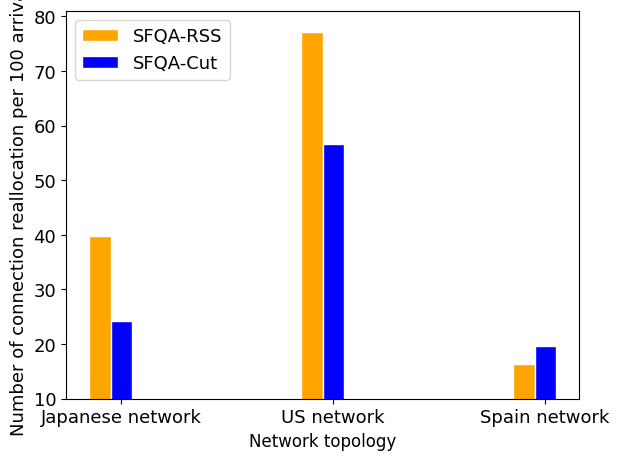

[9.59, 9.85, 7.2]


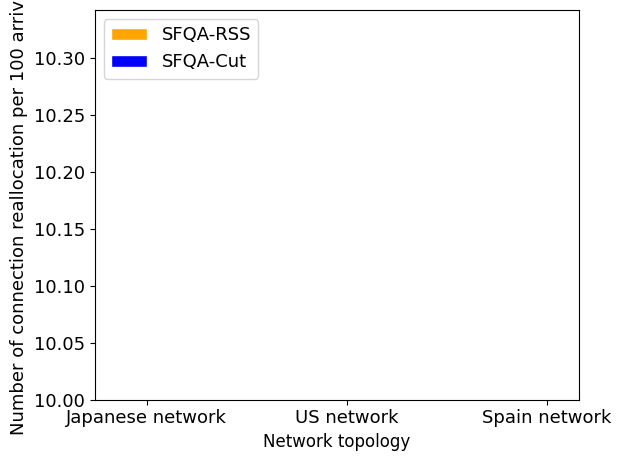

In [13]:
###Spectrum Waste for topologies

#Jpn
jpn_cycle_rss = 9.59
jpn_cycle_cut = 8.38
jpn_mv_rss = 39.8
jpn_mv_cut = 24.30

###US
spn_cycle_rss = 7.20
spn_cycle_cut = 7.65
spn_mv_rss = 16.29
spn_mv_cut = 19.57

## SPN

us_cycle_rss = 9.85
us_cycle_cut = 9.74
us_mv_rss = 77.07
us_mv_cut = 56.53


demand_matrices = range(1, 4)


# fig = plt.figure(figsize=[8.4, 4.8])
plt.figure()
sfqa_rss_mv = [jpn_mv_rss, us_mv_rss, spn_mv_rss]
sfqa_cut_mv = [jpn_mv_cut, us_mv_cut, spn_mv_cut]


label = 'SFQA-RSS'
plt.bar([x-.1 for x in demand_matrices],
       [x for x in sfqa_rss_mv ],
        0.1,
       label=label, color='orange', ec='white',)


label = 'SFQA-Cut'
plt.bar([x-.0 for x in demand_matrices],
       [x for x in sfqa_cut_mv],
        0.1,
       label=label, color='blue', ec='white')



# label = 'PF-SM-R+SA'
# plt.bar([x+.1 for x in demand_matrices],
#        [x for x in Spectrm_waste_PF_SM],
#         0.1,
#        label=label, color=colors[label], ec='white', hatch='//')



plt.xlabel('Network topology', fontsize=12)
# plt.xticks(demand_matrices, [f'{x:.1f}' for x in traffic_volumes])
plt.xticks(demand_matrices, ['Japanese network','US network','Spain network'])
plt.ylabel('Number of reallocations per 100 arrivals', fontsize=13 )
plt.legend(loc=2, fontsize="13")
plt.ylim(ymin=)
plt.tight_layout()
plt.savefig(f'{figures_floder}/move.pdf')
plt.savefig(f'{figures_floder}/move.svg')
plt.show()
plt.close()






[9.59, 9.85, 7.2]
[8.38, 9.74, 7.65]


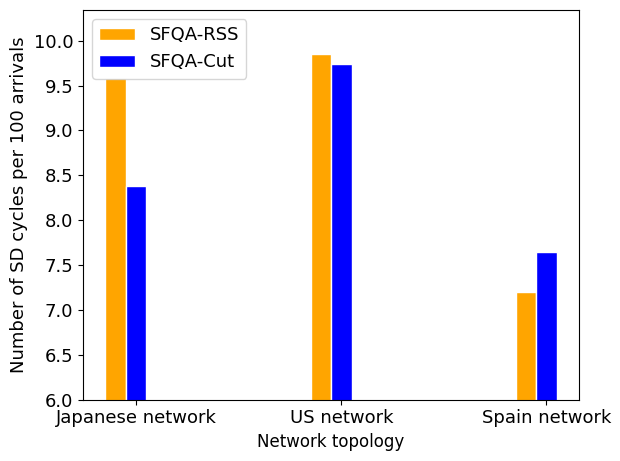

In [20]:
plt.figure()
sfqa_rss_cycle = [jpn_cycle_rss, us_cycle_rss, spn_cycle_rss]
sfqa_cut_cycle = [jpn_cycle_cut, us_cycle_cut, spn_cycle_cut]
print(sfqa_rss_cycle)
print(sfqa_cut_cycle)
demand_matrices = range(1, 4)
label = 'SFQA-RSS'
plt.bar([x-.1 for x in demand_matrices],
       [x for x in sfqa_rss_cycle ],
        0.1,
       label=label, color='orange', ec='white',)


label = 'SFQA-Cut'
plt.bar([x-.0 for x in demand_matrices],
       [x for x in sfqa_cut_cycle],
        0.1,
       label=label, color='blue', ec='white')



# label = 'PF-SM-R+SA'
# plt.bar([x+.1 for x in demand_matrices],
#        [x for x in Spectrm_waste_PF_SM],
#         0.1,
#        label=label, color=colors[label], ec='white', hatch='//')



plt.xlabel('Network topology', fontsize=12)
# plt.xticks(demand_matrices, [f'{x:.1f}' for x in traffic_volumes])
plt.xticks(demand_matrices, ['Japanese network','US network','Spain network'])
plt.ylabel('Number of SD cycles per 100 arrivals', fontsize=13 )
plt.legend(loc=2, fontsize="13")
plt.ylim(ymin=6)
plt.tight_layout()
plt.savefig(f'{figures_floder}/cycles.pdf')
plt.savefig(f'{figures_floder}/cycles.svg')
plt.show()
plt.close()